In [2]:


import os
os.environ["OPENAI_BASE_URL"] = "http://192.168.63.184:11434/v1"
os.environ["OPENAI_API_KEY"] = "ollama"
import t2ebm
import joblib
import interpret
import pandas as pd
from sklearn.model_selection import train_test_split
from interpret import show
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())



In [8]:
import joblib
import pandas as pd
import t2ebm
from interpretML import explainers
from interpret import show
from interpret import set_visualize_provider
from interpret.provider import InlineProvider

# 設定視覺化提供者
set_visualize_provider(InlineProvider())

# 初始化模型
feature_cols = ["Sex", "DM", "HTN", "CAD", "Age", "Pre_HD_SBP", "HR", "RR", "blood-speed",
                "Dialysis-blood-temp", "Dialysis-blood-rate", "start-weight", "Mean_BP",
                "HR_Mean_BP", "UF_BW_perc", "透析液 Ca", "體溫_New", "預估脫水量",
                "靜脈壓(mmHg)", "透析液壓(mmHg)", 'idh_count_last_28d']
target_col = "Nadir90/100"

# 讀取資料集
df = pd.read_csv('Patient5.csv')

# 加載模型
ml_model = joblib.load("EBM_28.joblib")

# 特徵資料與目標資料
X = df[feature_cols]
y = df[target_col]

# 使用 interpretML 解釋器來生成全域解釋
explainer = explainers.ExplainableBoostingMachine()
explainer.fit(X, y)

# 生成全域解釋
global_explanation = explainer.explain_global()

# 顯示原始解釋圖
show(global_explanation)

# 簡化全域解釋圖
simplified_graph = t2ebm.graphs.simplify_graph(global_explanation, min_variation_per_cent=5.0)

# 顯示簡化後的圖
show(simplified_graph)


ModuleNotFoundError: No module named 'interpretML'

原始數據:
          x         y
0  0.058084  0.309955
1  0.155995  0.884833
2  0.156019  0.784319
3  0.374540  0.662574
4  0.598658 -0.556749
5  0.601115 -0.784767
6  0.708073 -1.137992
7  0.731994 -1.049836
8  0.866176 -0.846487
9  0.950714 -0.273321


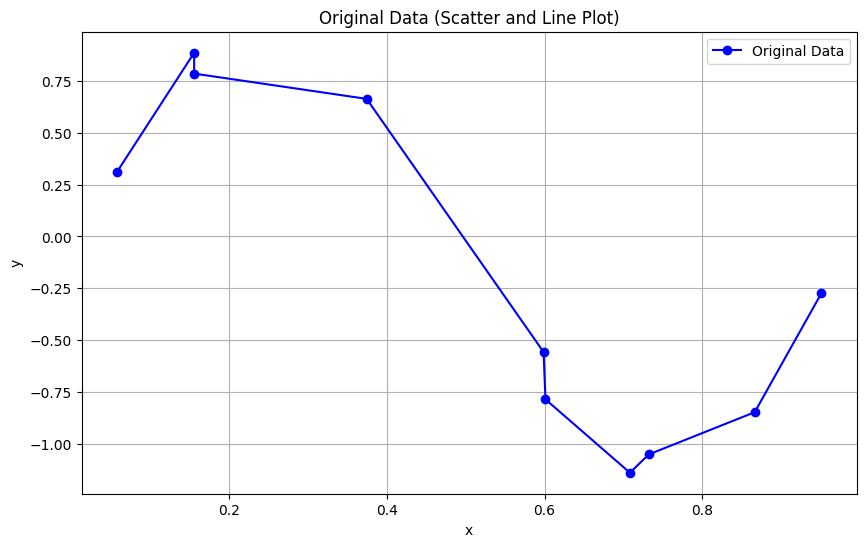

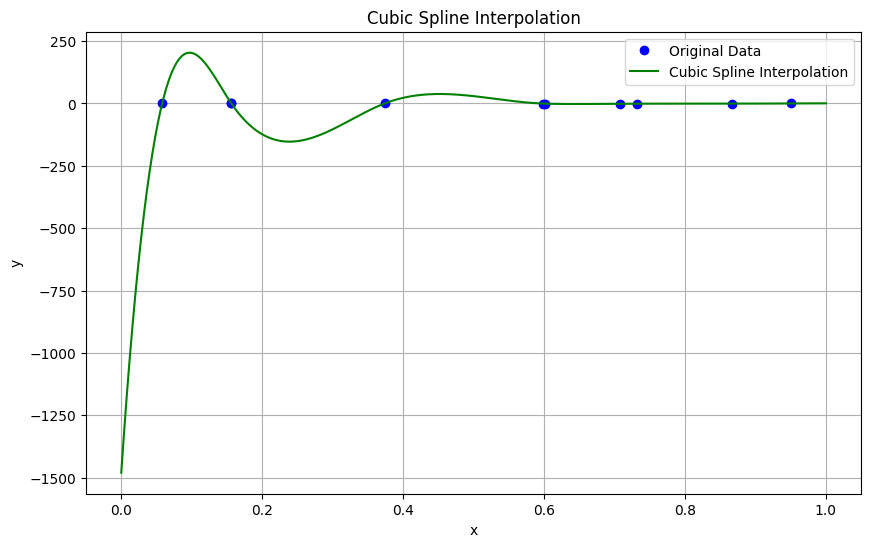

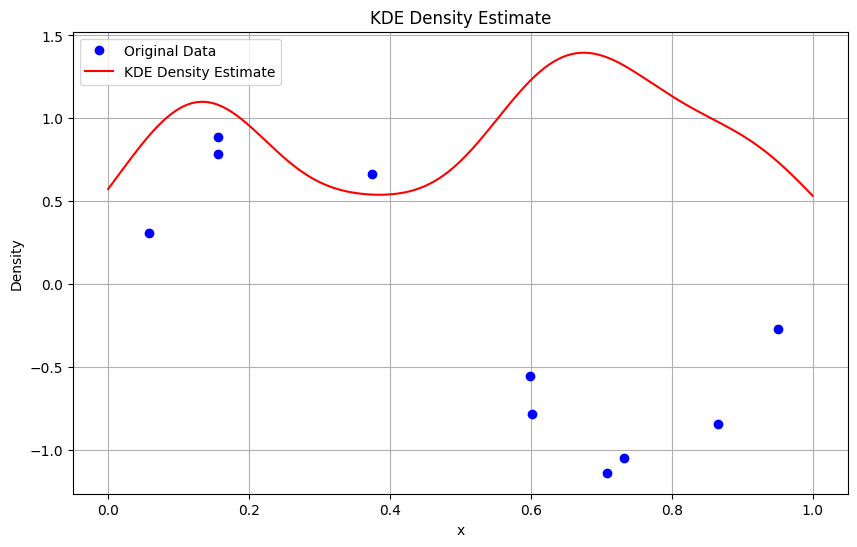

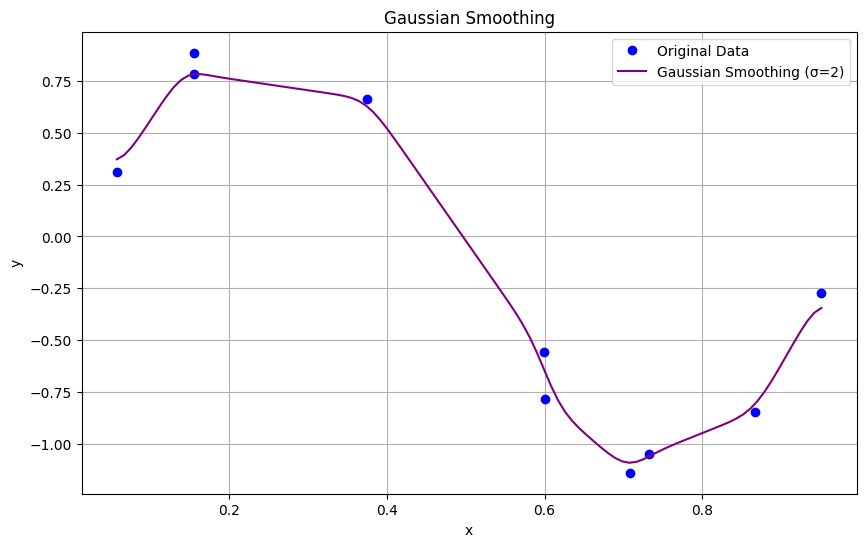

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
from sklearn.neighbors import KernelDensity
import pandas as pd

# 生成 10 組隨機數據 (x, y)
np.random.seed(42)
x = np.sort(np.random.rand(10))  # 隨機 10 個 x 值
y = np.sin(2 * np.pi * x) + 0.1 * np.random.randn(10)  # 用 sin 函數生成 y 並加一些噪音

# 創建 DataFrame 用於顯示
df = pd.DataFrame({"x": x, "y": y})
print("原始數據:")
print(df)

# 1. 原始折線圖
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', label="Original Data", color="blue")
plt.title("Original Data (Scatter and Line Plot)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 2. 使用 Cubic Spline 插值平滑數據
spline = CubicSpline(x, y)
x_smooth = np.linspace(0, 1, 500)  # 用 500 個點進行插值
y_smooth = spline(x_smooth)

# 2.1. 折線圖與 Cubic Spline 插值結果
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_smooth, y_smooth, '-', label="Cubic Spline Interpolation", color="green")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 3. 使用 KDE 計算密度估計
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(x[:, None])  # 注意這裡的 x 必須是列向量
x_kde = np.linspace(0, 1, 500)[:, None]  # 500 個點來計算 KDE
log_dens = kde.score_samples(x_kde)  # 計算 log 密度
y_kde = np.exp(log_dens)  # 轉換成普通密度

# 3.1. 原始數據與 KDE 平滑圖
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_kde, y_kde, '-', label="KDE Density Estimate", color="red")
plt.title("KDE Density Estimate")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# 4. 使用高斯平滑 (Gaussian Filter)
# 先進行插值以獲得均勻採樣的數據
x_interp = np.linspace(x.min(), x.max(), 100)  # 生成 100 個均勻的 x 點
y_interp = np.interp(x_interp, x, y)  # 使用線性插值來獲得 y 值

# 應用高斯濾波器
sigma = 2  # 標準差，控制平滑程度
y_gaussian = gaussian_filter1d(y_interp, sigma=sigma)

# 4.1. 原始數據與高斯平滑圖
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_interp, y_gaussian, '-', label=f"Gaussian Smoothing (σ={sigma})", color="purple")
plt.title("Gaussian Smoothing")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


原始數據:
      x     y
0  0.10  0.90
1  0.20  0.30
2  0.30  0.80
3  0.40  0.70
4  0.45  0.55
5  0.66  0.65
6  0.70  0.80
7  0.80  0.85
8  0.82  0.15
9  1.00  1.00


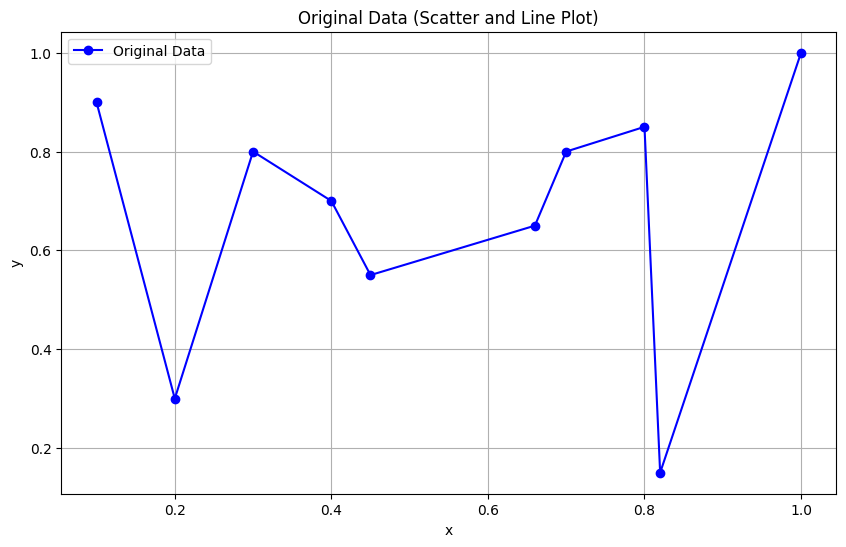

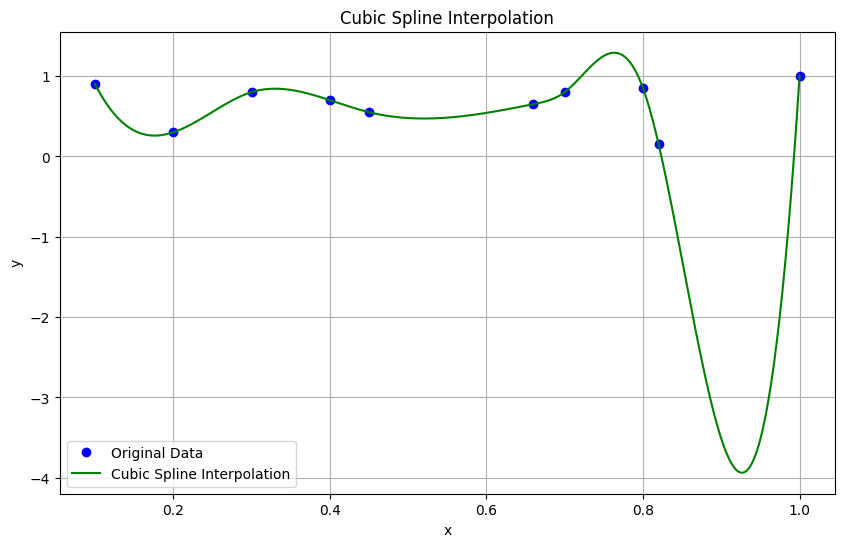

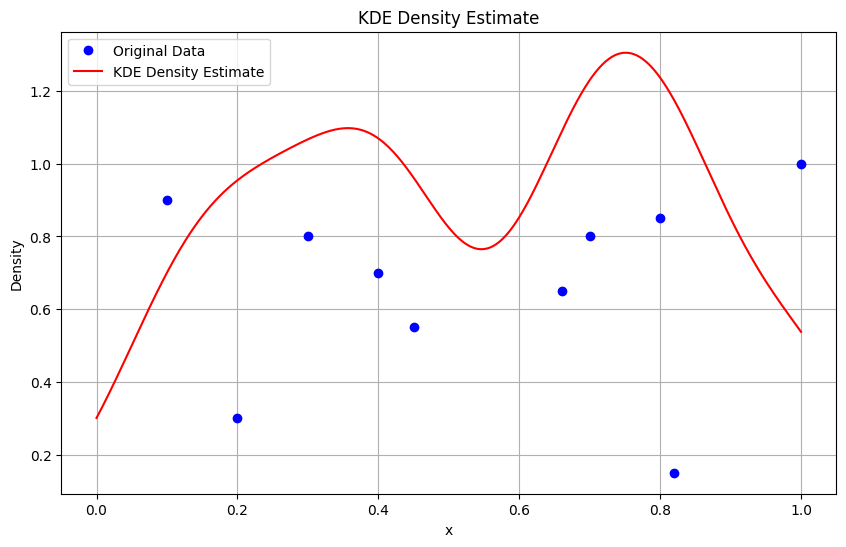

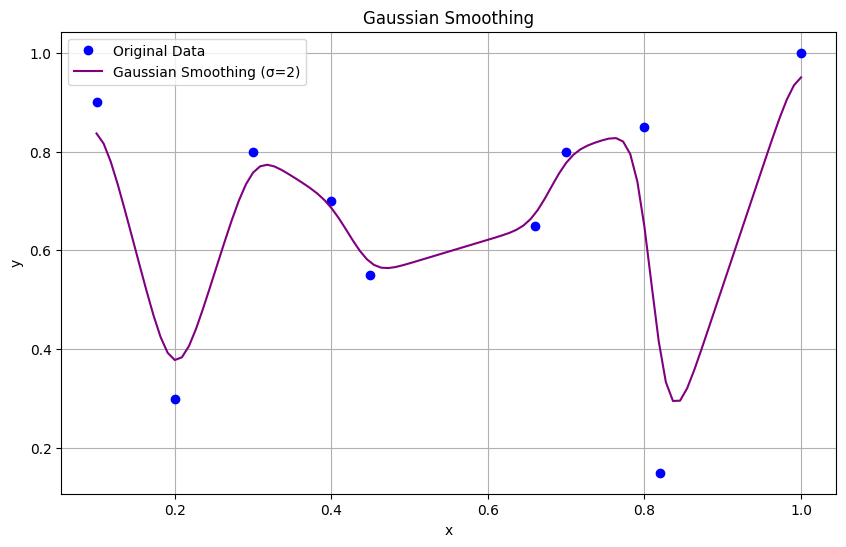

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
from sklearn.neighbors import KernelDensity
import pandas as pd

# 固定 10 組數據 (x, y)
x = np.array([0.1, 0.2, 0.3, 0.4, 0.45, 0.66, 0.7, 0.8, 0.82, 1.0])
y = np.array([0.9, 0.30, 0.8, 0.7, 0.55, 0.65, 0.80, 0.85, 0.15, 1.00])

# 創建 DataFrame 用於顯示
df = pd.DataFrame({"x": x, "y": y})
print("原始數據:")
print(df)

# 1. 原始折線圖
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o-', label="Original Data", color="blue")
plt.title("Original Data (Scatter and Line Plot)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 2. 使用 Cubic Spline 插值平滑數據
spline = CubicSpline(x, y)
x_smooth = np.linspace(min(x), max(x), 500)  # 用 500 個點進行插值
y_smooth = spline(x_smooth)

# 2.1. 折線圖與 Cubic Spline 插值結果
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_smooth, y_smooth, '-', label="Cubic Spline Interpolation", color="green")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 3. 使用 KDE 計算密度估計
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(x[:, None])  # 注意這裡的 x 必須是列向量
x_kde = np.linspace(0, 1, 500)[:, None]  # 500 個點來計算 KDE
log_dens = kde.score_samples(x_kde)  # 計算 log 密度
y_kde = np.exp(log_dens)  # 轉換成普通密度

# 3.1. 原始數據與 KDE 平滑圖
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_kde, y_kde, '-', label="KDE Density Estimate", color="red")
plt.title("KDE Density Estimate")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# 4. 使用高斯平滑 (Gaussian Filter)
# 先進行插值以獲得均勻採樣的數據
x_interp = np.linspace(x.min(), x.max(), 100)  # 生成 100 個均勻的 x 點
y_interp = np.interp(x_interp, x, y)  # 使用線性插值來獲得 y 值

# 應用高斯濾波器
sigma = 2  # 標準差，控制平滑程度
y_gaussian = gaussian_filter1d(y_interp, sigma=sigma)

# 4.1. 原始數據與高斯平滑圖
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_interp, y_gaussian, '-', label=f"Gaussian Smoothing (σ={sigma})", color="purple")
plt.title("Gaussian Smoothing")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


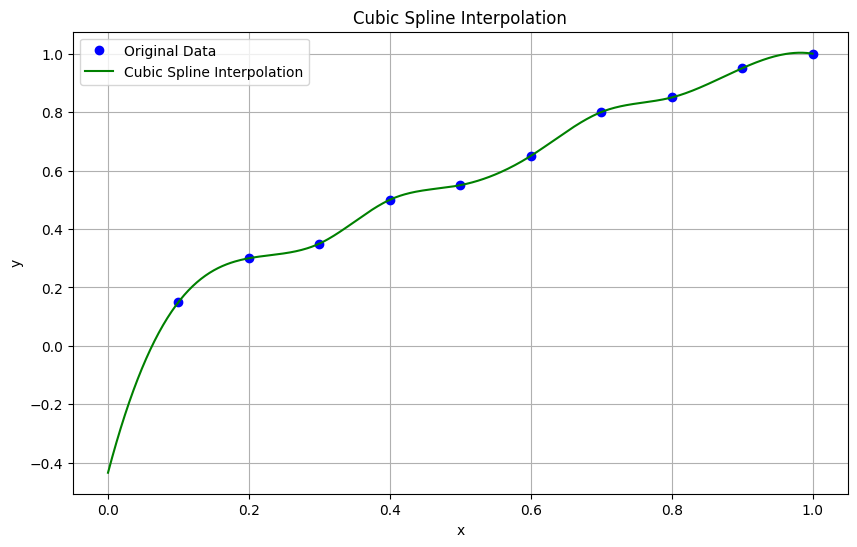

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 固定 10 組數據 (x, y)
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.15, 0.30, 0.35, 0.50, 0.55, 0.65, 0.80, 0.85, 0.95, 1.00])

# 創建 Cubic Spline 插值
spline = CubicSpline(x, y)

# 限制插值範圍在 [0, 1] 內
x_smooth = np.linspace(0, 1, 500)
y_smooth = spline(x_smooth)

# 顯示原始數據與插值結果
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label="Original Data", color="blue")
plt.plot(x_smooth, y_smooth, '-', label="Cubic Spline Interpolation", color="green")
plt.title("Cubic Spline Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
